In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
from collections import Counter
from statistics import mean
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import random 
import math
import nltk
import re

news = pd.read_csv('evaluation.csv', sep=";")
news = news.drop(news.columns[0], axis=1)
news

,title,text,label
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...
8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

def temp_clean_text(text):
    """
    Function takes in an inputted line of text to be cleaned, formatted, and seperated into
    a list for later use.

    text: line of text to be cleaned

    returns: list
    """
    text = text.replace('U.S.', 'US')
    text = re.sub(r'\W+', ' ', text)
    tokens = text.lower().split()
    return [word for word in tokens if word not in stopwords.words('english') and word != 's']

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

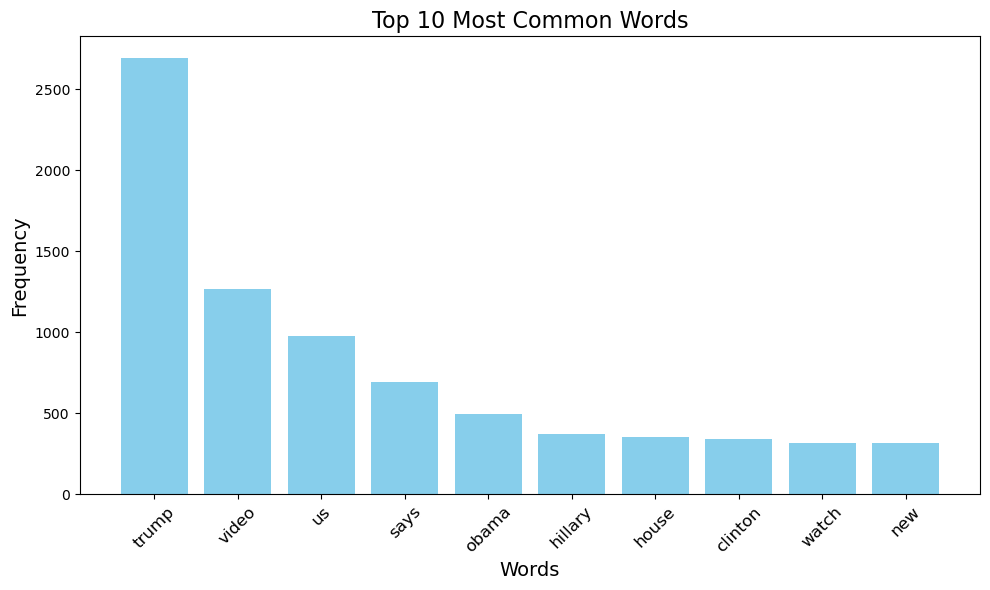

In [47]:
all_words = news['title'].dropna().apply(temp_clean_text).sum()
word_counts = Counter(all_words).most_common(10)

words, counts = zip(*word_counts)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 10 Most Common Words', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Text Character Length Frequency')

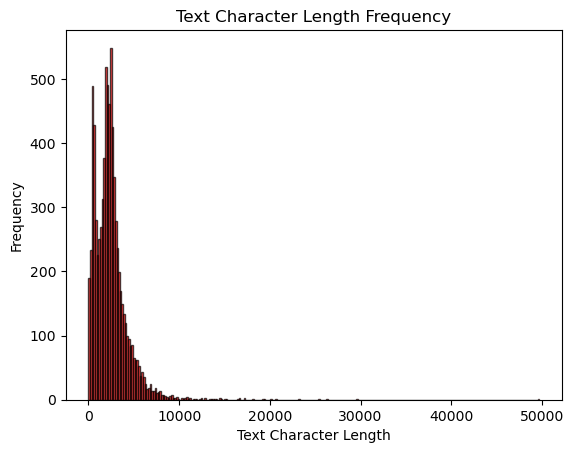

In [49]:
news['text_char_length'] = news['text'].apply(lambda x : len(str(x)))
news['title_char_length'] = news['title'].apply(lambda x : len(str(x)))

plt.hist(news['text_char_length'], bins='auto', alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Text Character Length')
plt.ylabel('Frequency')
plt.title('Text Character Length Frequency')

In [50]:
from wordcloud import WordCloud

def create_wordcloud(df, label):
    """
    Function to generate word cloud for a given label.

    label: str
    """

    text = ' '.join(df[df['label']== label]['text'].fillna('').tolist())
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for label {label}')
    plt.show()

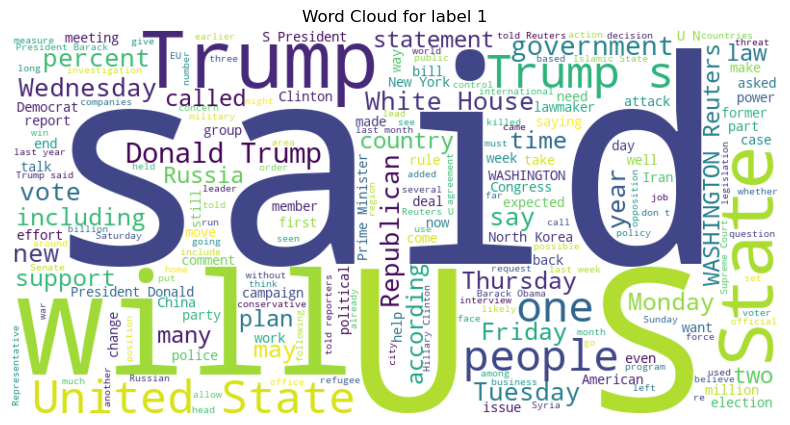

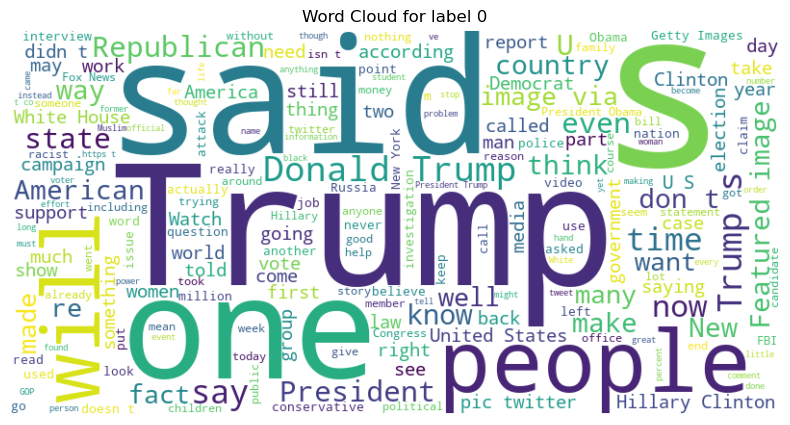

In [51]:
for label in news['label'].unique():
    create_wordcloud(news, label)

In [52]:
news['title_score'] = news['title'].apply(analyze_sentiment)
news['text_score'] = news['text'].apply(analyze_sentiment)

In [53]:
news = news.dropna(subset=['title', 'text'])
news['clean_title'] = news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
news['clean_text'] = news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

news['title_sentence_length'] = news['clean_title'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)
news['text_sentence_length'] = news['clean_text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

news['title_word_length'] = news['clean_title'].apply(lambda x: len(x.split()))
news['text_word_length'] = news['clean_text'].apply(lambda x: len(x.split()))

In [54]:
news = news.drop(['clean_text', 'clean_title'], axis=1)
news

,title,text,label,text_char_length,title_char_length,title_score,text_score,title_sentence_length,text_sentence_length,title_word_length,text_word_length
0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1,2172,64,0.0000,-0.3527,2,15,8,217
1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1,525,59,0.3182,0.6249,0,3,6,50
2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0,2961,94,0.0000,-0.9929,0,30,14,278
3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0,2788,62,0.6369,0.9579,0,30,8,250
4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0,118,83,-0.5023,0.6523,0,3,15,10
...,...,...,...,...,...,...,...,...,...,...,...
8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0,3637,89,0.3612,-0.9928,0,36,15,364
8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0,1115,87,-0.2808,0.7062,0,5,10,108
8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0,1717,82,-0.4404,-0.9743,0,20,13,182
8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1,1360,65,0.0000,0.1045,0,12,10,148


In [55]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error
from scipy import stats
import joblib

def log_transform(X):
    X = X.clip(min=1e-8)
    return np.log(X)

In [56]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(log_transform, feature_names_out="one-to-one"), StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ("log", log_pipeline, make_column_selector(dtype_include=np.number)),
    
],
remainder= default_num_pipeline)

models = {
    "Linear Regression": make_pipeline(preprocessing, LinearRegression()),
    "Ridge Regression": make_pipeline(preprocessing, Ridge()),
    "Lasso Regression": make_pipeline(preprocessing, Lasso()),
    "Random Forest Regressor": make_pipeline(preprocessing, RandomForestRegressor(random_state=42)),
    "Random Forest Classifier": make_pipeline(preprocessing, RandomForestClassifier(random_state=42)),
    "Gradient Boosting Regressor": make_pipeline(preprocessing, GradientBoostingRegressor(random_state=42)),
    "Support Vector Regressor": make_pipeline(preprocessing, SVR()),
    "K-Nearest Neighbors": make_pipeline(preprocessing, KNeighborsRegressor()),
}

In [57]:
x_cols = ['text_word_length','title_word_length','title_score','text_score',
         'title_sentence_length','text_sentence_length','text_char_length','title_char_length']

y_col = 'label'

x_data = news[x_cols].copy()
x_data = x_data.fillna(0)

y_data = news[y_col].copy()
y_data = y_data.dropna()

results = {}

for model_name, model in models.items():
    
    model_rmses = -cross_val_score(model, x_data, y_data, scoring="neg_root_mean_squared_error", cv=10)
    
    results[model_name] = {
        "RMSE": np.mean(model_rmses)
    }
    
results_df = pd.DataFrame(results)

In [58]:
results_df.head()

,Linear Regression,Ridge Regression,Lasso Regression,Random Forest Regressor,Random Forest Classifier,Gradient Boosting Regressor,Support Vector Regressor,K-Nearest Neighbors
RMSE,0.374731,0.373671,0.499055,0.261296,0.304294,0.262419,0.272681,0.28866


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("scaler", StandardScaler()),
    ("random_forest", RandomForestRegressor(random_state=42))
])

random_search = RandomizedSearchCV(
    full_pipeline, 
    param_distributions = {
    "random_forest__n_estimators": randint(50, 300),  # Number of trees
    "random_forest__max_depth": randint(5, 50),       # Maximum depth
    "random_forest__min_samples_split": randint(2, 20),  # Minimum samples to split
    "random_forest__min_samples_leaf": randint(1, 10),   # Minimum samples per leaf
    "random_forest__max_features": uniform(0.1, 0.9),    # Fraction of features to consider
},
    n_iter=50,              # Number of parameter settings to sample
    scoring="neg_root_mean_squared_error",  # Use RMSE as a scoring metric
    cv=5,                   # 5-fold cross-validation
    random_state=42,
    verbose=2,              # Print progress
    n_jobs=-1               # Use all available cores
)

random_search.fit(x_data, y_data)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore')...
                                        'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002683B3FA950>,
                                        'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002683B3F8650>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002683B480410>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [60]:
best_params = random_search.best_params_

In [61]:
best_rf = RandomForestClassifier(
    max_depth=best_params['random_forest__max_depth'],
    max_features=best_params['random_forest__max_features'],
    min_samples_leaf=best_params['random_forest__min_samples_leaf'],
    min_samples_split=best_params['random_forest__min_samples_split'],
    n_estimators=best_params['random_forest__n_estimators'],
    class_weight='balanced',
    random_state=42  
)

final_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", best_rf)
])

In [62]:
def get_train_test(data, test_size):
    train_num = list(range(0, len(data)))
    random.shuffle(train_num)

    test_num = train_num[:test_size]
    train_num = train_num[test_size:]

    train = data.iloc[train_num]
    test = data.iloc[test_num]

    return train, test

In [63]:
rf_data = news.copy()
train, test = get_train_test(rf_data, test_size=int(0.2 * len(rf_data)))

final_pipeline.fit(train[x_cols], train[y_col])
final_pipeline.score(test[x_cols], test[y_col])

0.9149722735674677

In [64]:
from sklearn.metrics import accuracy_score

predictions = final_pipeline.predict(test[x_cols])
accuracy = accuracy_score(test[y_col], predictions)
accuracy

0.9149722735674677

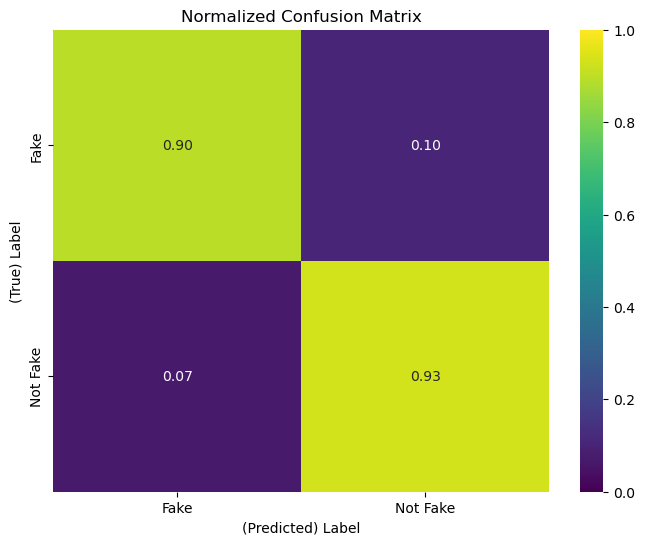

In [65]:
cm = confusion_matrix(test[y_col], predictions)
cm_norm = cm / cm.sum(axis=1).reshape(-1, 1)
labels = ['Fake', 'Not Fake']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='viridis', xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
plt.title('Normalized Confusion Matrix')
plt.ylabel('(True) Label')
plt.xlabel('(Predicted) Label')
plt.show()